In [23]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#@author: Kelle Clark, Andrew Florian, Xinyu Xiong
#Created on Tue Feb  4 10:05:49 2020
#CSCI 6040 Project 1 Text Generation

#PHASE 2: Find the unigram, bigram, trigram and quadgram models ...Building on phase 1

#Various folders of .txt files were created in the CSCI6040 Team Project 1 folder
#to be used for testing our application during develpment
#/Short Test Data
# has 3 .txt files each about 4KB
#/Med test Data 
# has 2 .txt files one of 119KB (Tragedy of Macbeth) and 6.5MB (big)
#/Grande test Data (the 18-document-gutenburg-copus but with 19? files cleaned using the 
#boilerplate.ipynb -author Andrew Florian and resulting files 
#shared on Canvas in Project 1 discussion forum)
# has 19 .txt files with a total of 11.8MB

In [24]:
#we needed the help of a few packages...import all those at once
import langid
import itertools 
import nltk
import numpy
import os
import pandas
import random
import re
import string
import sys
from collections import Counter
from math import log10
from matplotlib.pyplot import yscale, xscale, title, plot
from nltk.tokenize import word_tokenize, sent_tokenize

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

#from keras.models import Sequential
#from keras.layers import Dense, Dropout, LSTM
#from keras.utils import np_utils
#from keras.callbacks import ModelCheckpoint


In [25]:
#THE SECOND PHASE OF THE CSCI6040 PROJECT 1'S DEVELOPMENT

#After working with the larger corpus, it was found that other characters beyond punctuation needed
#to be removed from the words and reading in the .txt files using encoding 'utf-8' worked better
#the following starts from the original directory and "cleans/tokenizes" the files, file by file
#method will remove "special" characters and digits and replace them with spaces
#the team thought it best to only consider words A-Za-z, include hyphens and quotation marks when 
#they were inside a word.

#the team left in the option to scale the application later to include identifying the 
#language of each file
#langid can be installed using pip install langid...but team not completely sure about the 
#values and the reliability of this program...see https://github.com/saffsd/langid.py

def tokensByFiles(folderpath):
    textfiles = [f for f in os.listdir(folderpath) if '.txt' in f]
    tokenfilelist =[]
    
    for f in textfiles:
            rawcorpus = []
            substring = ''
            file = open(folderpath+"/"+f,'rt', encoding='utf-8', errors='replace')                                   
            print (f"     Reading from: '{f}' . . .")
            rawcorpus.append(file.read()
                     .replace('. . .','.')
                     .replace('!',' .')  # substitue space period for ! mark to have a simple token to end a sentence 
                     .replace('"',' ')
                     .replace('#',' ')  
                     .replace('$',' ')
                     .replace('%',' ')
                     .replace('&',' ')
                     .replace('\\',' ') 
                     .replace('\' ',' ')  # only remove ' if it has a space before or after meaning it is used as a quote
                     .replace(' \'',' ')  # but leave it in if it is inside a word as a contraction
                     .replace('\- ',' ')  # only remove - if it has a space before or after meaning it is to be left in the 
                     .replace(' \-',' ')  # word e.g. C-A-T
                     .replace('(',' ')
                     .replace('\n', ' ')        
                     .replace(')',' ')
                     .replace('*',' ')
                     .replace('+',' ')
                     .replace(',',' ')
                     .replace('. ',' ')  
                     .replace('/',' ')                 
                     .replace(':',' ')
                     .replace(';',' ')
                     .replace('<',' ')
                     .replace('=',' ')
                     .replace('>',' ')
                     .replace('?',' .')  # substitue space period for ? mark to have a simple token to end a sentence
                     .replace('@',' ')
                     .replace('[',' ')
                     .replace('\\',' ')
                     .replace(']',' ')
                     .replace('^',' ')
                     .replace('_',' ')   #  remove all unwanted punctuation
                     .replace('`',' ')
                     .replace('{',' ')
                     .replace('|',' ')
                     .replace('}',' ')
                     .replace('~',' ')
                     .replace('0',' ')   #  remove all digits
                     .replace('1',' ')
                     .replace('2',' ')
                     .replace('3',' ')
                     .replace('4',' ')
                     .replace('5',' ')                
                     .replace('6',' ')
                     .replace('7',' ')
                     .replace('8',' ')
                     .replace('9',' '))            
            file.close()
            
            substring = substring + rawcorpus[0]
            #print(f"the language of file "+f+" is {nltk.language(substring)}")
            print(f"the estimated language of the file {f} is {langid.classify(substring)}")
            
            #tokens=substring.split()
            tokens = word_tokenize(substring)
            tokens = [w.lower() for w in tokens]
            tokenfilelist.append(tokens)
             
    return tokenfilelist

#-----------------------------------------
#read in the corups file by file
#the pathname for the folder containing the files to be read in is currently hardcoded
#***if you want to change the pathname, uncomment the 2nd line and put in your pathname of choice
#***if you want to use the test data, leave the hardcoded pathname (do not uncommnet 2nd line) 
#*** there are several folders of test data in our folder

pathname = 'Test Data/short test data'
#pathname = 'your choice of path here'

tokenfilelist = tokensByFiles(pathname)
#print(tokenfilelist)

     Reading from: 'Testset1.txt' . . .
the estimated language of the file Testset1.txt is ('en', -112.47618627548218)
     Reading from: 'Testset2.txt' . . .
the estimated language of the file Testset2.txt is ('en', -757.8414204120636)
     Reading from: 'Testset3.txt' . . .
the estimated language of the file Testset3.txt is ('en', -295.17291164398193)


In [26]:
#we have the different files tokenized, in the variable tokenfilelist
#method below creates one corpus from the string of tokens in each file 

def createOneCorpus(inlist):
    temp = " "
    for i in range(len(inlist)):
        for w in inlist[i]:
            temp = temp + w + " "
    return temp

def printcorpus(instring):
    if len(instring) > 500: 
        print(f"The first & last 50 tokens of this corpus are:\n  {instring[:50]} \t ... {instring[-50:]}\n")
    else:
        print(f"The tokens in the corpus are: \n {instring} \n")

tokencorpus = createOneCorpus(tokenfilelist)
printcorpus(tokencorpus)

The tokens in the corpus are: 
  the cat named bob is damn good he is the best c-a-t on earth what do we do if there are hyphens capitols in the middle of a word misspellings . do we want to keep track of words at the beginning of sentences . our test data need to have enough words that have high frequency what do we do with words like .exe or http www.weirdo.com and and . this damn cat whose name is bob is no good my dog is better cats should not exist on earth dogs are the best  



In [27]:
# enumerate ngrams code copied from Eisentein and CSCI6040 ipynb
# returns the ngram from instring and n
def ngrams(instring, n):
    outset = {}
    for i in range(len(instring) - n + 1):
        g = ' '.join(instring[i:i+n])
        outset.setdefault(g, 0)
        outset[g] += 1
    return outset

In [28]:
#unigram prob. model using prob(x) = (frequency of x in corpus)/(total in corpus)
def createUnigramModel(instring):
    n = 1
    outset = word_tokenize(instring)

    totalpossible = len(outset)
    sumofprob = 0
    
    anoutcome = ngrams(outset,n)
    probmodel = anoutcome
  
    for keyword in anoutcome:
        probmodel[keyword] = (anoutcome[keyword]) / totalpossible
        sumofprob = sumofprob + probmodel[keyword]
    
    print(f"The sum of all unigram probabiities needs to be 1 and it is {sumofprob}\n")
    return probmodel
 

In [12]:
#create the unigram model 
unigrammodel = createUnigramModel(tokencorpus)


pandas.set_option("display.max_rows", 10)
unidataframe = pandas.DataFrame.from_dict(unigrammodel, orient = 'index', columns = ['prob.'])
print('Number of rows in Unigram Prob. Model : ', len(unidataframe.index))
print(unidataframe)


The sum of all the probabiities needs to be 1 and it is 1.0000000000000009

Number of rows in Unigram Prob. Model :  63
           prob.
the     0.052632
cat     0.021053
named   0.010526
bob     0.021053
is      0.052632
...          ...
cats    0.010526
should  0.010526
not     0.010526
exist   0.010526
dogs    0.010526

[63 rows x 1 columns]


the word of greatest freq unigram is: do 



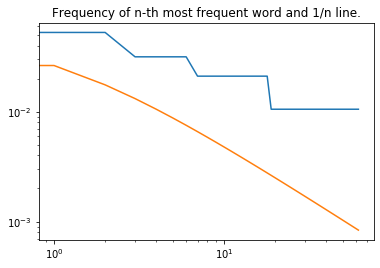

In [29]:
#Attempt to try and plot the unigram language model using first a Counter object
COUNT = Counter(unigrammodel)
greatestprob = 0
bigword = ''
for w in COUNT.keys():
    if COUNT[w] >= greatestprob:
        bigword = w
        greatestprob = COUNT[w]
        
print(f"the unigram of greatest freq unigram is: {bigword} \n")
M = COUNT[bigword]
yscale('log'); xscale('log'); title('Frequency of n-th most frequent word and 1/n line.')
##RAN INTO SOME ISSUES GETTING THE GRAPH TO PRINT THE RANK ORDER OF THE WORDS...
##BUT WHAT I THINK THIS IS SHOWING IS THAT IF WE WANT TO SMOOTH THE PROB. MODEL FOR
##UNIGRAMS, WE COULD USE PROB. M/i for the ith rankend term and M is the frequency of the
##MOST COMMON UNIGRAM
plot([c for (w,c) in COUNT.most_common()])
plot([M/i for i in range(1, len(COUNT)+1)]);

In [30]:
#method to create the bigram model
def createBigramModel(instring):
    n = 2
    outset = word_tokenize(instring)
    totalpossible = len(outset)
   
    anoutcome = ngrams(outset,n)
    previousoutcome = ngrams(outset,n-1)
    sumofprob = 0
    
    probmodel = anoutcome
       
    for keyword in anoutcome:
        listword = keyword.split()
        prob1 = (previousoutcome[listword[0]]) / totalpossible
        probmodel[keyword] = prob1 * ((probmodel[keyword]) / (previousoutcome[listword[0]]))
        sumofprob = sumofprob + probmodel[keyword]
        
    print(f"The sum of all bigram probabiities needs to be 1 and it is {sumofprob}")
    return probmodel  



In [15]:
#create the bigram model
bigrammodel = createBigramModel(tokencorpus)


pandas.set_option("display.max_rows", 10)
bidataframe = pandas.DataFrame.from_dict(bigrammodel, orient = 'index', columns = ['prob.'])
print('Number of rows in Bigram Prob. Model : ', len(bidataframe.index))
print(bidataframe)


The sum of all the probabiities needs to be 1 and it is 0.9894736842105274
Number of rows in Bigram Prob. Model :  87
               prob.
the cat     0.010526
cat named   0.010526
named bob   0.010526
bob is      0.021053
is damn     0.010526
...              ...
not exist   0.010526
exist on    0.010526
earth dogs  0.010526
dogs are    0.010526
are the     0.010526

[87 rows x 1 columns]


the word of greatest freq bigram is: are the 



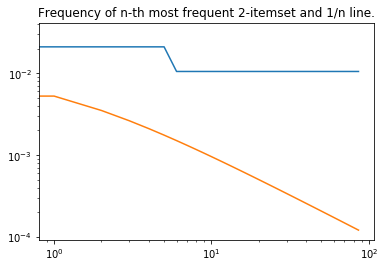

In [31]:
#Attempt to try and plot the bigram language model using first a Counter object
COUNT2 = Counter(bigrammodel)
greatestprob2 = 0
bigword2 = ''
for w in COUNT2.keys():
    if COUNT2[w] >= greatestprob2:
        bigword2 = w
        greatestprob2 = COUNT[w]
        
print(f"the bigram of greatest freq bigram is: {bigword2} \n")
M2 = COUNT2[bigword2]
yscale('log'); xscale('log'); title('Frequency of n-th most frequent 2-itemset and 1/n line.')
##RAN INTO SOME ISSUES GETTING THE GRAPH TO PRINT THE RANK ORDER OF THE WORDS...
##BUT WHAT I THINK THIS IS SHOWING IS THAT IF WE WANT TO SMOOTH THE PROB. MODEL FOR
##BIGRAMS, WE COULD USE PROB. M/i for the ith rankend term and M is the frequency of the
##MOST COMMON BIGRAM
plot([c for (w,c) in COUNT2.most_common()])
plot([(M2)/i for i in range(1, len(COUNT2)+1)]);



In [32]:
#create the trigram model
def createTrigramModel(instring):
    n = 3
    outset = word_tokenize(instring)
    totalpossible = len(outset)
   
    anoutcome = ngrams(outset,3)
    probmodel = anoutcome
    sumofprob = 0
    
    previous1outcome = ngrams(outset,n-2)
    previous2outcome = ngrams(outset,n-1)
    
    for keyword in anoutcome:    
        listword = keyword.split()
        wordofinterest = listword[0]
        prob1 = previous1outcome[wordofinterest]/ totalpossible
           
        wordofinterest = listword[0] + " " + listword[1]
        prob2 = previous2outcome[wordofinterest]/previous1outcome[listword[0]] 
           
        wordofinterest = keyword
        probmodel[keyword] = prob1 * prob2 * anoutcome[wordofinterest]/ previous2outcome[listword[0]+ " " + listword[1]]
        sumofprob = sumofprob + probmodel[keyword]
        
    print(f"The sum of all trigram probabiities needs to be 1 and it is {sumofprob}")
    return probmodel  


In [18]:
#create the trigram model
trigrammodel = createTrigramModel(tokencorpus)


pandas.set_option("display.max_rows", 10)
tridataframe = pandas.DataFrame.from_dict(trigrammodel, orient = 'index', columns = ['prob.'])
print('Number of rows in Trigram Prob. Model : ', len(tridataframe.index))
print(tridataframe)


The sum of all the probabiities needs to be 1 and it is 0.9789473684210537
Number of rows in Trigram Prob. Model :  91
                   prob.
the cat named   0.010526
cat named bob   0.010526
named bob is    0.010526
bob is damn     0.010526
is damn good    0.010526
...                  ...
exist on earth  0.010526
on earth dogs   0.010526
earth dogs are  0.010526
dogs are the    0.010526
are the best    0.010526

[91 rows x 1 columns]


the word of greatest freq trigram is: what do we 



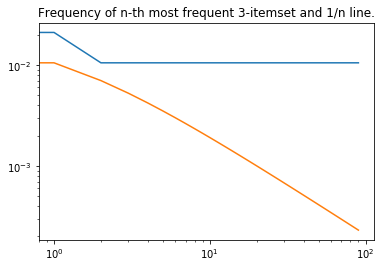

In [33]:
#Attempt to plot the trigram language model using first a Counter object
COUNT3 = Counter(trigrammodel)
greatestprob3 = 0
bigword3 = ''
for w in COUNT3.keys():
    if COUNT3[w] >= greatestprob3:
        bigword3 = w
        greatestprob3 = COUNT3[w]
        
print(f"the trigram of greatest freq trigram is: {bigword3} \n")
M3 = COUNT3[bigword3]
yscale('log'); xscale('log'); title('Frequency of n-th most frequent 3-itemset and 1/n line.')
##RAN INTO SOME ISSUES GETTING THE GRAPH TO PRINT THE RANK ORDER OF THE WORDS...
##BUT WHAT I THINK THIS IS SHOWING IS THAT IF WE WANT TO SMOOTH THE PROB. MODEL FOR
##TRIGRAMS, WE COULD USE PROB. M3/i for the ith rankend term and M3 is the frequency of the
##MOST COMMON TRIGRAM
plot([c for (w,c) in COUNT3.most_common()])
plot([(M3)/i for i in range(1, len(COUNT3)+1)]);

In [34]:
#create the quadgram model
def createQuadgramModel(instring):
   n = 4
   outset = word_tokenize(instring)
   totalpossible = len(outset)
   
   anoutcome = ngrams(outset,n)
   probmodel = anoutcome   
   sumofprob = 0
   
   previous1outcome = ngrams(outset,n-3)
   previous2outcome = ngrams(outset,n-2)
   previous3outcome = ngrams(outset,n-1)
  
   for keyword in anoutcome:       
       listword = keyword.split()
       wordofinterest = listword[0]
       prob1 = previous1outcome[wordofinterest]/ totalpossible
           
       wordofinterest = listword[0] + " " + listword[1]
       prob2 = previous2outcome[wordofinterest]/previous1outcome[listword[0]] 
           
       wordofinterest = listword[0]+ " " + listword[1] + " " + listword[2]
       prob3 = previous3outcome[wordofinterest]/previous2outcome[listword[0] + " " + listword[1]]
           
       wordofinterest = keyword
       probmodel[keyword] = prob1 * prob2 * prob3 * anoutcome[wordofinterest]/ previous3outcome[listword[0]+ " " + listword[1] + " "+ listword[2]]
       sumofprob = sumofprob + probmodel[keyword]
           
   print(f"The sum of all quadgram probabiities needs to be 1 and it is {sumofprob}")
   return probmodel  


In [21]:
#create the quadgram model
quadgrammodel = createQuadgramModel(tokencorpus)


pandas.set_option("display.max_rows", 10)
quaddataframe = pandas.DataFrame.from_dict(quadgrammodel, orient = 'index', columns = ['prob.'])
print('Number of rows in Quadgram Prob. Model : ', len(quaddataframe.index))
print(quaddataframe)


The sum of all he probabiities needs to be 1 and it is 0.96842105263158
Number of rows in Quadgram Prob. Model :  91
                        prob.
the cat named bob    0.010526
cat named bob is     0.010526
named bob is damn    0.010526
bob is damn good     0.010526
is damn good he      0.010526
...                       ...
not exist on earth   0.010526
exist on earth dogs  0.010526
on earth dogs are    0.010526
earth dogs are the   0.010526
dogs are the best    0.010526

[91 rows x 1 columns]


the word of greatest freq quadgram is: what do we do 



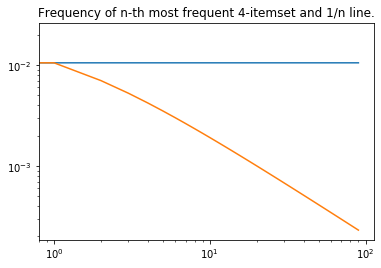

In [35]:
#Attempt to plot the trigram language model using first a Counter object
COUNT4 = Counter(quadgrammodel)
greatestprob4 = 0
bigword4 = ''
for w in COUNT4.keys():
    if COUNT4[w] >= greatestprob4:
        bigword4 = w
        greatestprob4 = COUNT4[w]
        
print(f"the quadgram of greatest freq  is: {bigword4} \n")
M4 = COUNT4[bigword4]
yscale('log'); xscale('log'); title('Frequency of n-th most frequent 4-itemset and 1/n line.')
##RAN INTO SOME ISSUES GETTING THE GRAPH TO PRINT THE RANK ORDER OF THE WORDS...
##BUT WHAT I THINK THIS IS SHOWING IS THAT IF WE WANT TO SMOOTH THE PROB. MODEL FOR
##QUADGRAMS, WE COULD USE PROB. M4/i for the ith rankend term and M3 is the frequency of the
##MOST COMMON TRIGRAM
plot([c for (w,c) in COUNT4.most_common()])
plot([(M4)/i for i in range(1, len(COUNT4)+1)]);